Step 1. Importing all required libraries and reading the data from the csv file (traffic-volume.csv) 

pandas 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume.csv')

Data exploratory analysis 

In [4]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [7]:
# Display summary statistics for numerical columns
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [11]:
# Checking missing values
missing_values_of_train_data = data.isnull().sum()
missing_values_of_train_data[missing_values_of_train_data > 0]

is_holiday    33707
dtype: int64

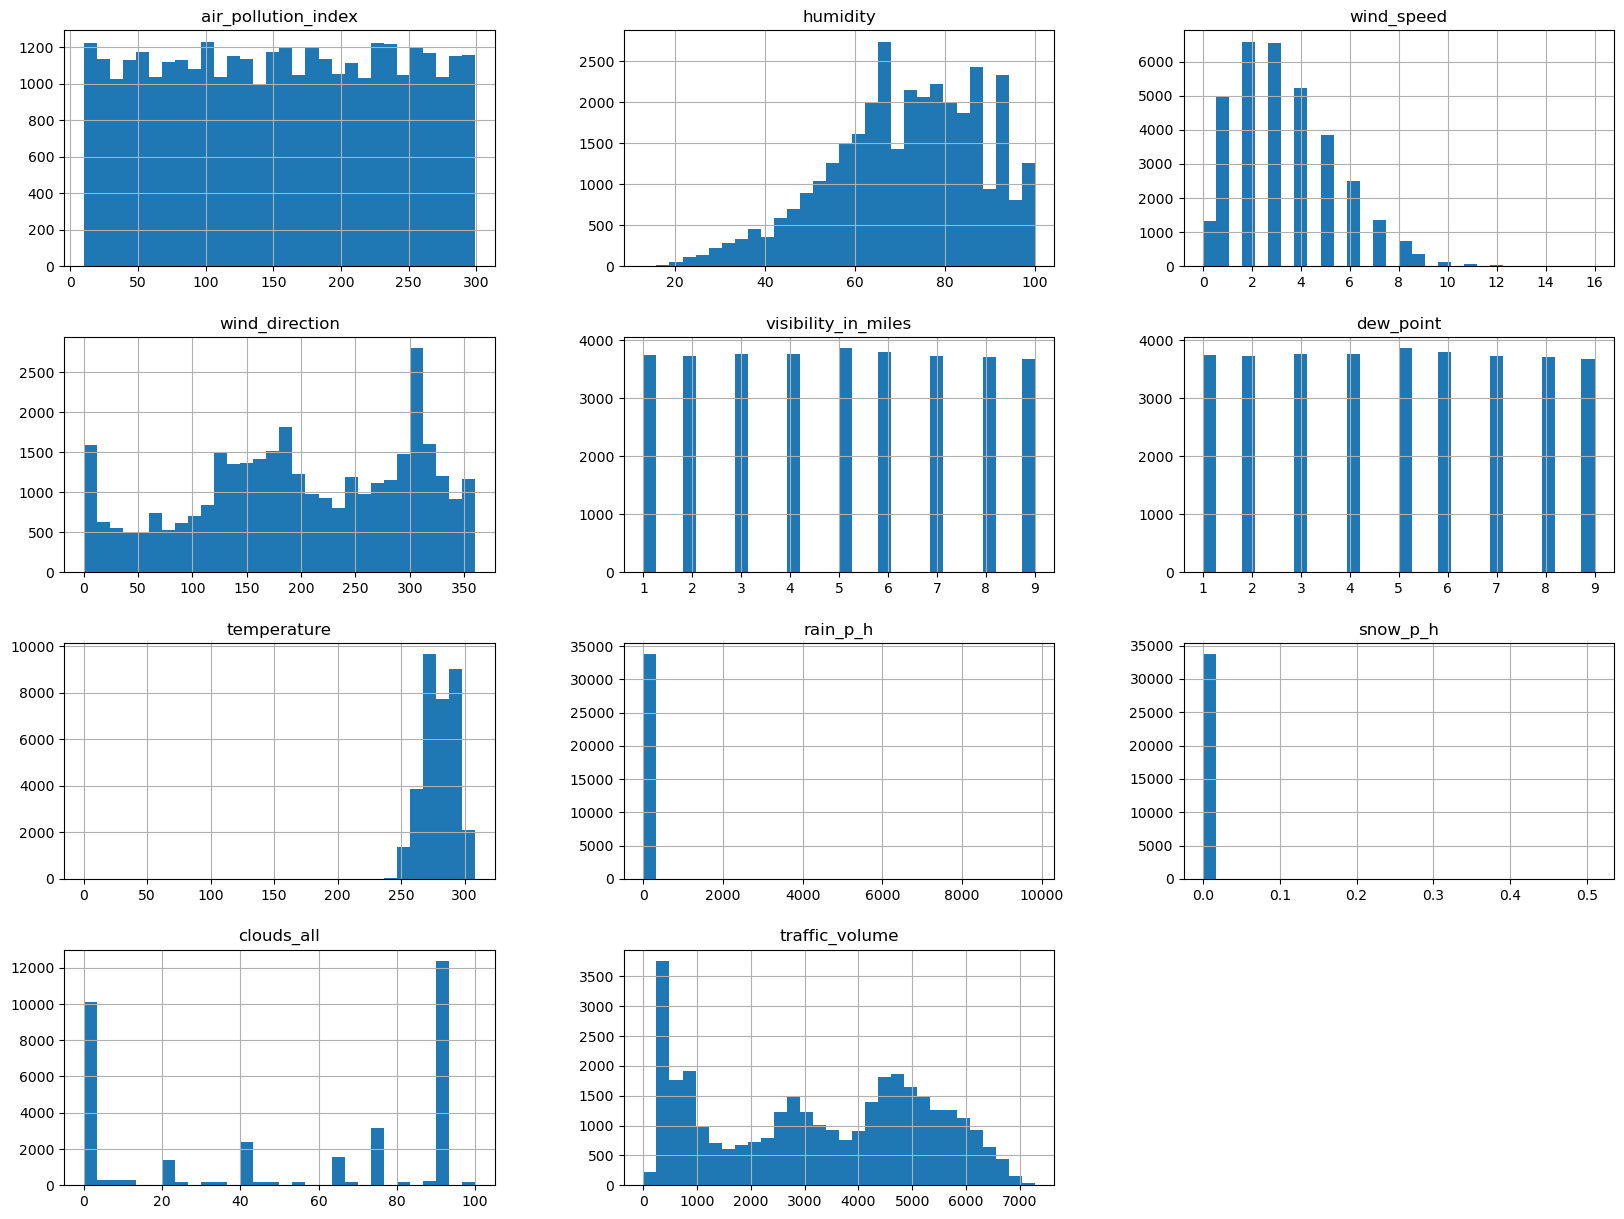

In [13]:
# Plot histograms for all numerical features 
data.hist(bins = 30,figsize = (20,15))
plt.show()

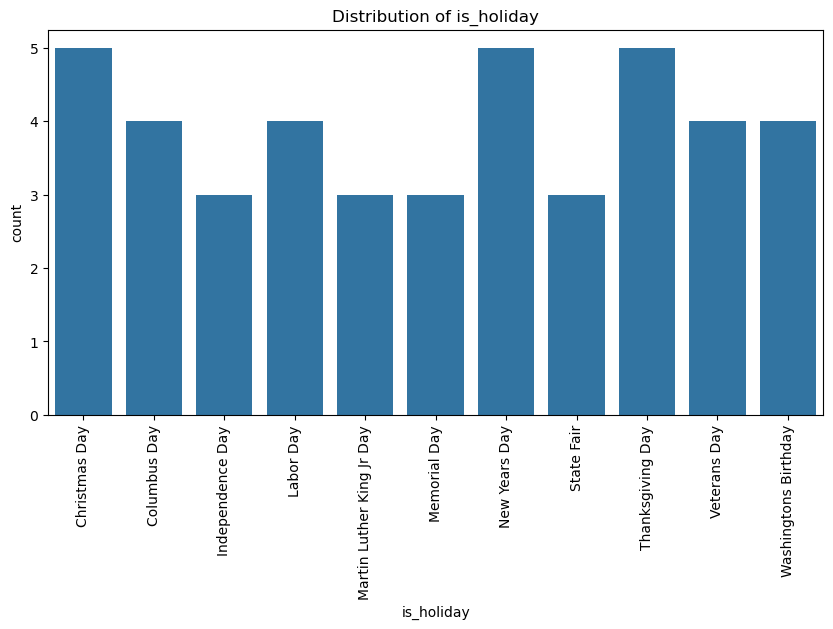

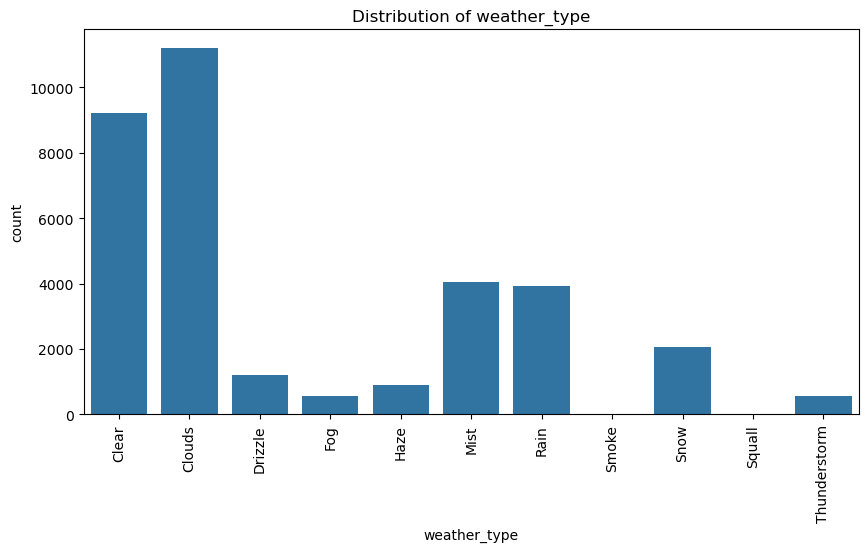

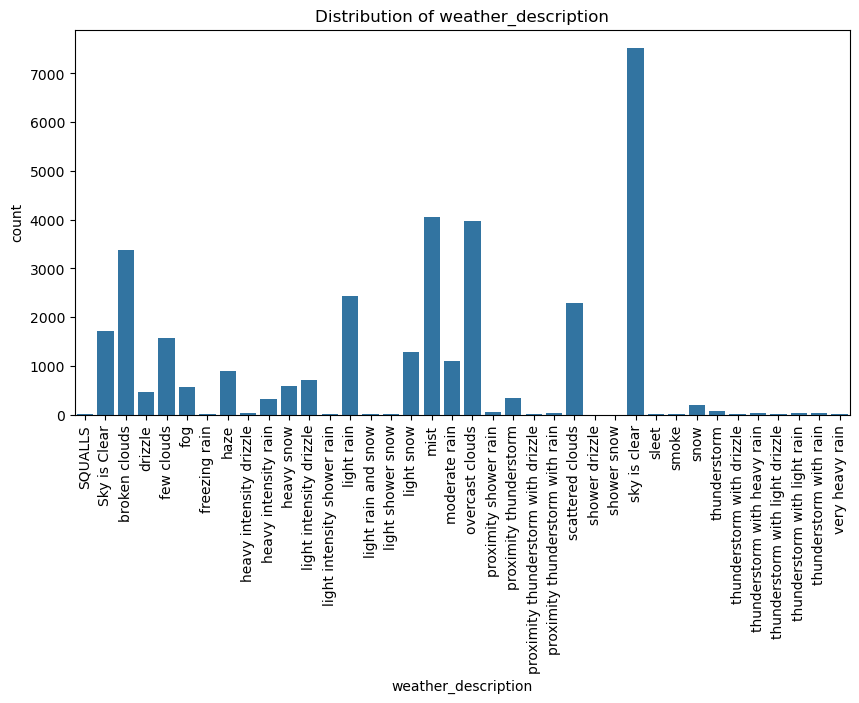

In [14]:
# Plotting the distribution of categorical features 
data = data.copy()
data['is_holiday'] = data['is_holiday'].astype('category')
data['weather_type'] = data['weather_type'].astype('category')
data['weather_description'] = data['weather_description'].astype('category')

# Plotting the distribution of categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

Correlation Analysis - to find the correlation between the 'traffic flow' and other features 

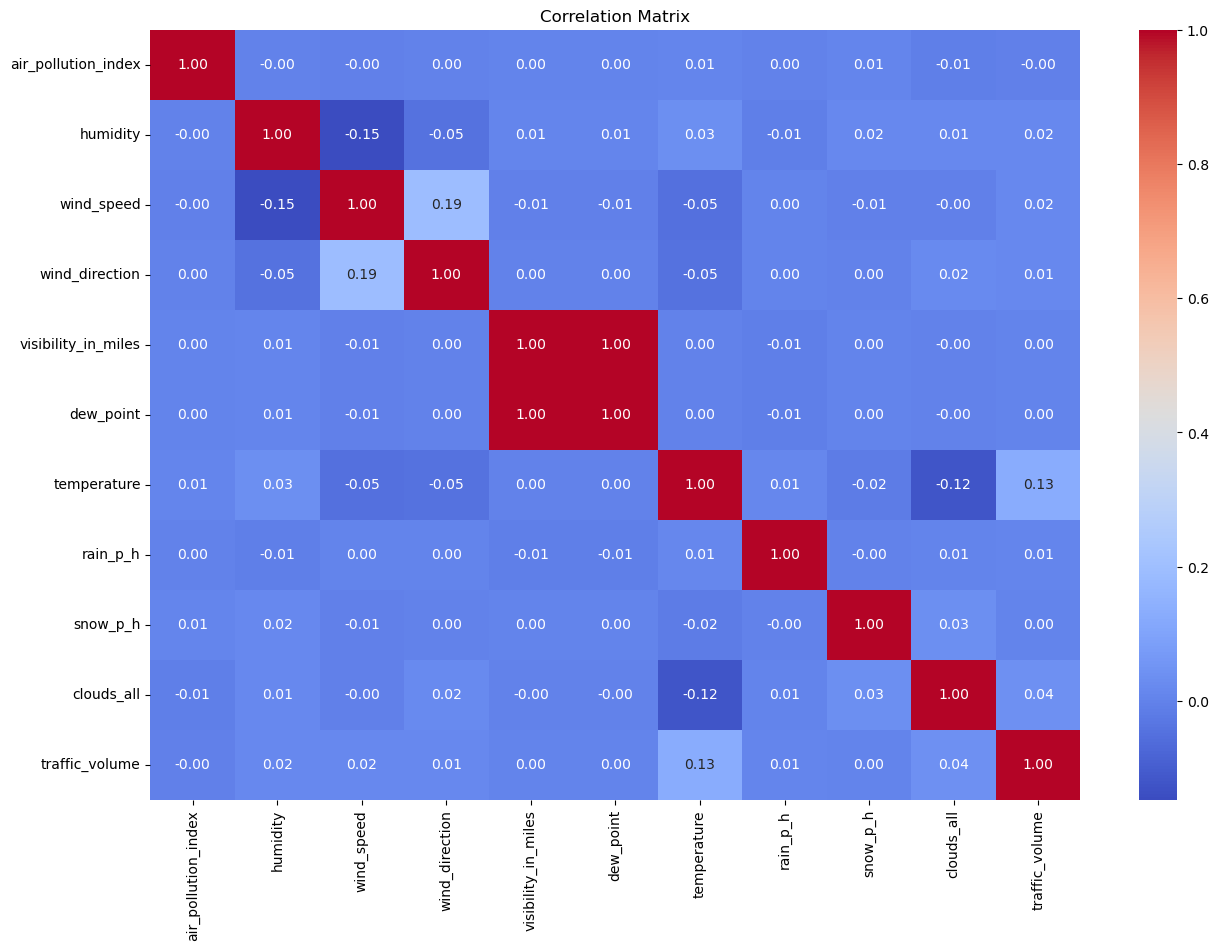

In [16]:
# Compute the correlation matrix
data = data.select_dtypes(include = 'number')

correlation_matrix = data.corr()

# Generate a heatmap to visualize correlations
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,annot = True,fmt = ".2f",cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

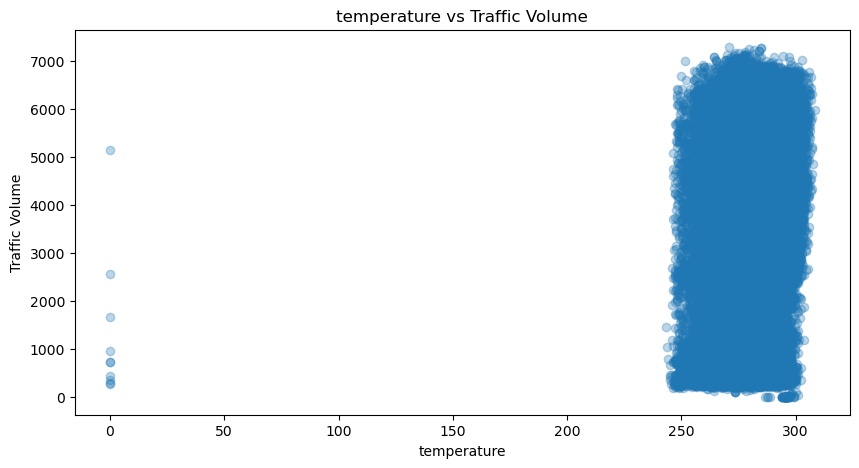

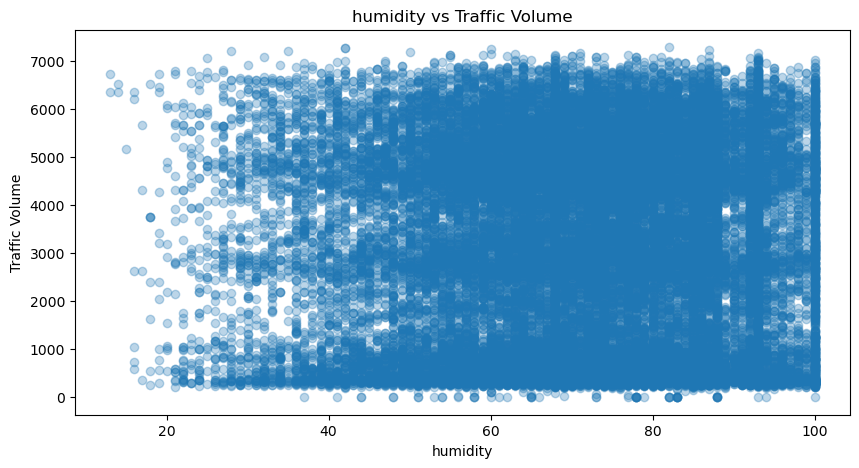

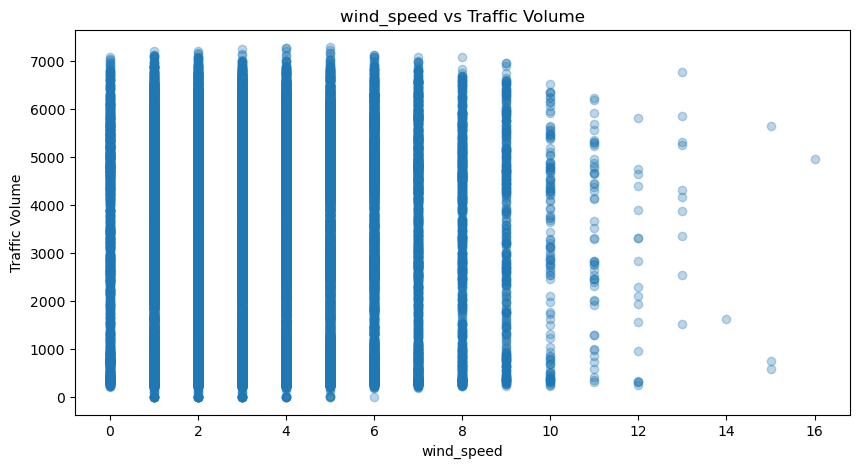

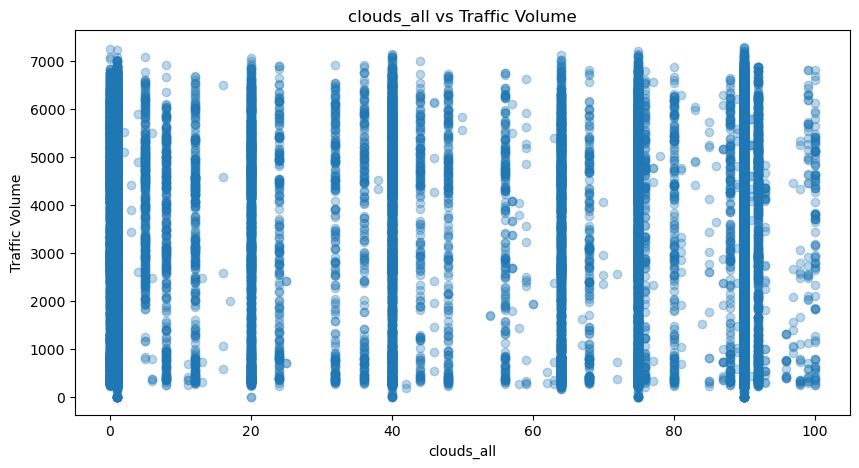

In [19]:
data = data.copy()
important_features = ['temperature', 'humidity', 'wind_speed', 'clouds_all' ]

for feature in important_features:
    plt.figure(figsize=(10, 5))
    plt.scatter(data[feature], data['traffic_volume'], alpha=0.3)
    plt.title(f'{feature} vs Traffic Volume')
    plt.xlabel(feature)
    plt.ylabel('Traffic Volume')
    plt.show()

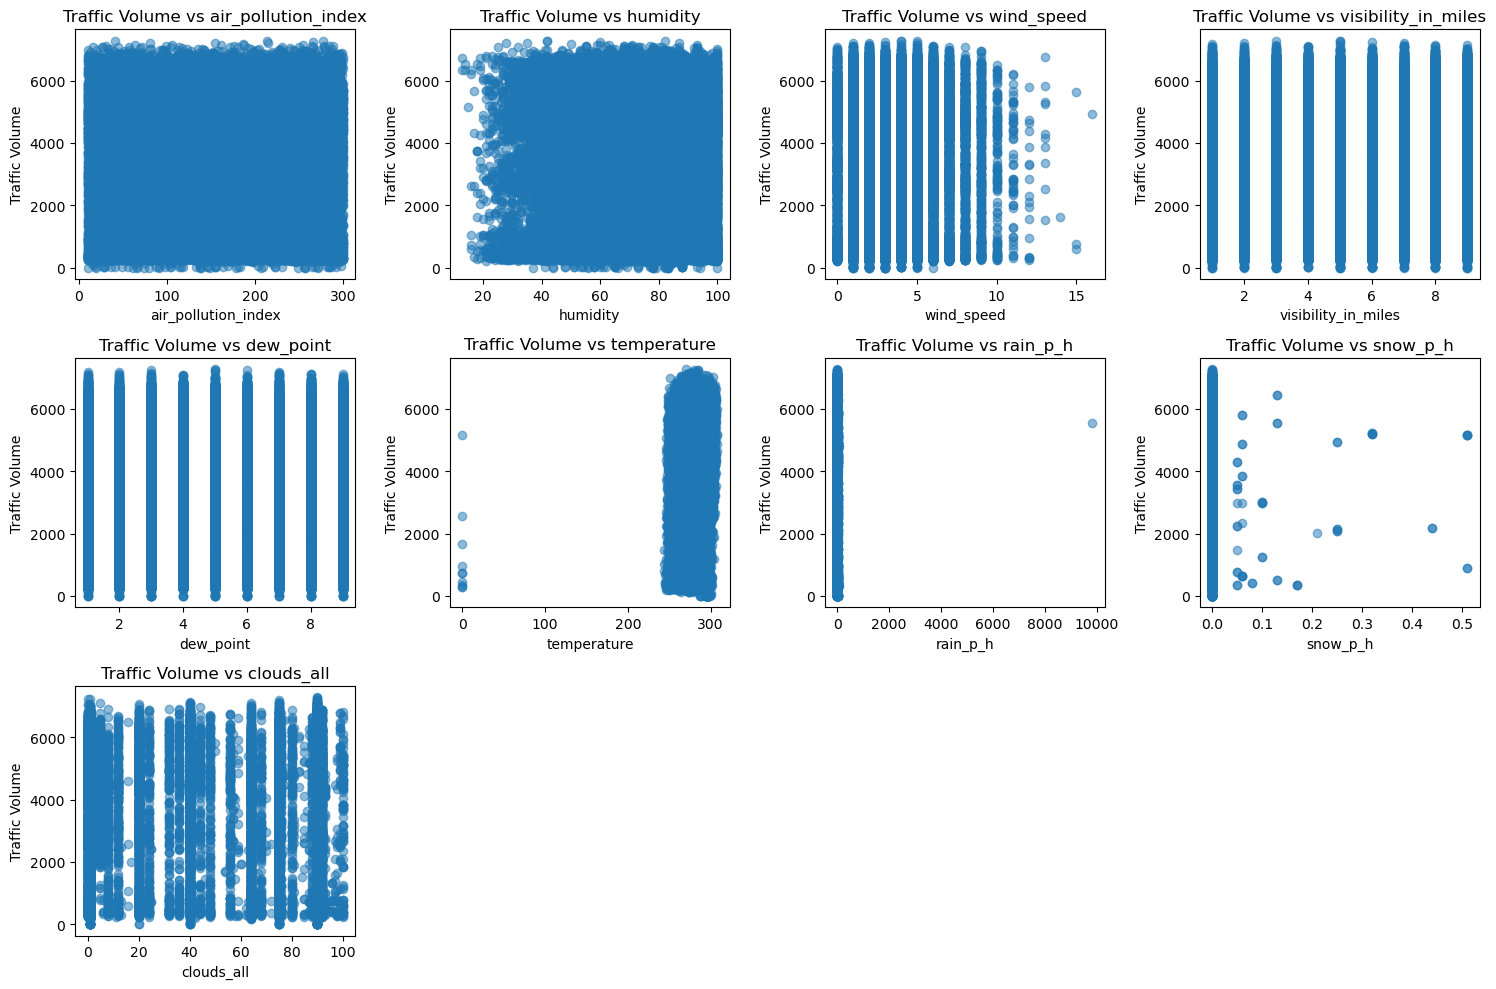

In [21]:
data = pd.read_csv('/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume.csv')
if 'date_time' in data.columns:
    data['date_time'] = pd.to_datetime(data['date_time'])
else:
    print("Warning: 'date_time' column not found in data.")

# Scatter plots for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['air_pollution_index', 'humidity', 'wind_speed', 'visibility_in_miles', 
                      'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all']

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    plt.scatter(data[feature], data['traffic_volume'], alpha=0.5)
    plt.title(f'Traffic Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Traffic Volume')

plt.tight_layout()
plt.show()



Analysis for time - volume relations

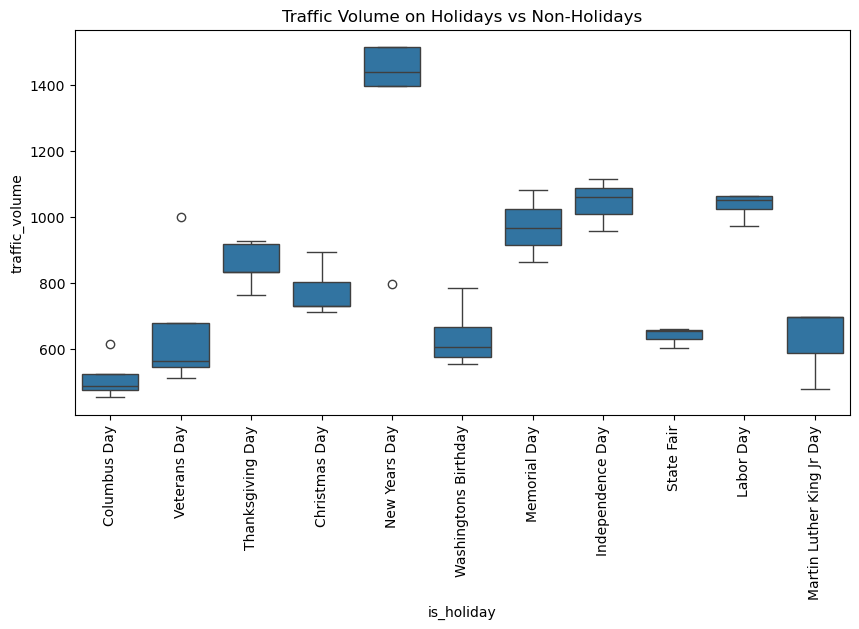

In [24]:
data = pd.read_csv('/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume.csv')
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_holiday', y='traffic_volume', data=data)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xticks(rotation = 90)
plt.show()

Data preprocessing 

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest


def load_data(df):
    return df.copy()

def handle_null_values(df):
    data = df.copy()
    data['is_holiday'] = data['is_holiday'].fillna('no').apply(lambda x: 'yes' if x != 'no' else 'no')
    return data

def apply_iqr(df, iqr_columns):
    df_cleaned = df.copy()
    for column_name in iqr_columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column_name] >= lower_bound) & (df_cleaned[column_name] <= upper_bound)]
    return df_cleaned

def apply_isolation_forest(df, if_columns, contamination=0.01):
    df_cleaned = df.copy()
    for column_name in if_columns:
        iso_forest = IsolationForest(contamination=contamination)
        df_cleaned['outlier'] = iso_forest.fit_predict(df_cleaned[[column_name]])
        df_cleaned = df_cleaned[df_cleaned['outlier'] != -1].drop(columns=['outlier'])
    return df_cleaned

def handle_outliers(df, is_train):
    data = df.copy()
    iqr_columns = ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction',
                   'visibility_in_miles', 'dew_point', 'temperature', 'clouds_all']
    if is_train:
        iqr_columns.append('traffic_volume')
    if_columns = ['rain_p_h', 'snow_p_h']
    df_cleaned_iqr = apply_iqr(data, iqr_columns)
    df_cleaned_isolation = apply_isolation_forest(data, if_columns)
    df_combined = pd.merge(df_cleaned_isolation, df_cleaned_iqr, how='outer')
    return df_combined

def transform_data(df):
    data = df.copy()
    data['date_time'] = pd.to_datetime(data['date_time'])
    data['year'] = data['date_time'].dt.year
    data['month'] = data['date_time'].dt.month
    data['day'] = data['date_time'].dt.day
    data['hour'] = data['date_time'].dt.hour
    data['day_of_week'] = data['date_time'].dt.dayofweek
    data.drop('date_time', axis=1, inplace=True)
    return data

def encode_data(df):
    data = df.copy()
    data = pd.get_dummies(data, columns=['is_holiday', 'weather_type'])
    count_encoding = data['weather_description'].value_counts().to_dict()
    data['weather_description_encoded'] = data['weather_description'].map(count_encoding)
    data.drop('weather_description', axis=1, inplace=True)
    return data

def scale_data(df, is_train):
    data = df.copy()
    non_numeric_columns = data.select_dtypes(exclude=['number']).columns
    numeric_data = data.drop(columns=non_numeric_columns)
    if is_train:
        target_column = 'traffic_volume'
        features = numeric_data.drop(columns=[target_column])
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features)
        scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
        scaled_df[target_column] = numeric_data[target_column].values
        scaled_df = pd.concat([scaled_df, data[non_numeric_columns].reset_index(drop=True)], axis=1)
        data = scaled_df.copy()
    else:
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(numeric_data)
        df_scaled = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=numeric_data.index)
        df_scaled = pd.concat([df_scaled, data[non_numeric_columns].reset_index(drop=True)], axis=1)
        data = df_scaled.copy()
    return data

def split_and_merge_training_data(df):
    data = df.copy()
    cols = [col for col in data.columns if col != 'traffic_volume'] + ['traffic_volume']
    data_merged = data[cols]
    return data_merged

def preprocess_data(df, is_train):
    data = load_data(df)
    data_without_null = handle_null_values(data)
    data_without_outliers = handle_outliers(data_without_null, is_train)
    data_transformed = transform_data(data_without_outliers)
    data_encoded = encode_data(data_transformed)
    data_scaled = scale_data(data_encoded, is_train)
    if is_train:
        data = split_and_merge_training_data(data_scaled)
    else:
        data = data_scaled.copy()
    return data

def load_dataset(file_path):
    return pd.read_csv(file_path)

def process():
    # Specify file paths
    file_path = '/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume.csv'  

    # Load the data
    print("Loading data...")
    data = load_dataset(file_path)

    # Data preprocessing
    print("Preprocessing training data...")
    processed_data = preprocess_data(data, is_train=True)

    # Save the processed data
    processed_path = '/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume_processed_data.csv'

    print(f"Saving processed  data to: {processed_path}")
    processed_data.to_csv(processed_path, index=False)

    print("Data preprocessing complete.")

In [28]:
process()

Loading data...
Preprocessing training data...
Saving processed  data to: /Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume_processed_data.csv
Data preprocessing complete.


Divide the dataset into train and test sets (80 and 20%)

In [32]:

data=pd.read_csv('/Users/asylkaziahmetova/Desktop/bit/traffic-management/data/traffic-volume_processed_data.csv')
# Select features and target variable

x = data.drop(columns=['traffic_volume'])  # Features
y = data['traffic_volume']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Models training 

------------------------------
Training RMSE: 152.35497089918343
Training MAE: 84.88474128671433
Training R^2: 0.9941503728990609
------------------------------
Test RMSE: 402.2740259197196
Test MAE: 221.24739555555556
Test R^2: 0.9590974978385296
------------------------------


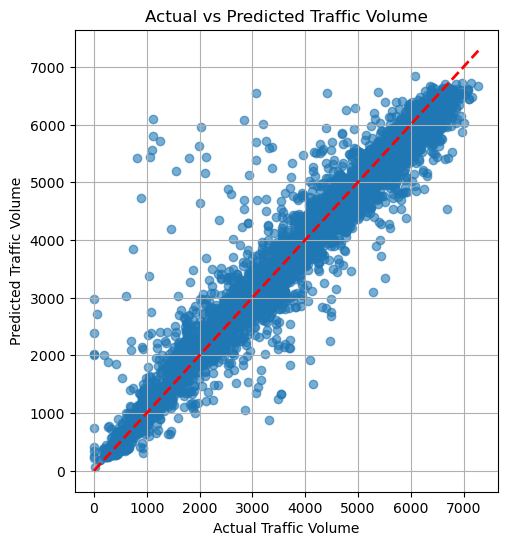

In [34]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def display_prediction(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    print("-" * 30)
    print("Training RMSE:", root_mean_squared_error(y_train, train_predictions))
    print("Training MAE:", mean_absolute_error(y_train, train_predictions))
    print("Training R^2:", r2_score(y_train, train_predictions))
    print("-" * 30)

    test_predictions = model.predict(X_test)
    print("Test RMSE:", root_mean_squared_error(y_test, test_predictions))
    print("Test MAE:", mean_absolute_error(y_test, test_predictions))
    print("Test R^2:", r2_score(y_test, test_predictions))
    print("-" * 30)

    return train_predictions, test_predictions

train_preds, test_preds = display_prediction(rf_model, X_train, y_train, X_test, y_test)

plt.figure(figsize=(12, 6))

# Actual vs. Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, test_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()],
         'r--', lw=2) 
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.grid(True)


plt.show()
